## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_pd = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
merged_pd.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
len(merged_pd["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_pd.groupby(["Mouse ID","Timepoint"]).count()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
single_mouse_pd = merged_pd.loc[merged_pd['Timepoint'] == 0]
single_mouse_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
len(single_mouse_pd['Mouse ID'])

250

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)"]].copy()
Summary_count_df = Summary_df.groupby(["Drug Regimen"]).count()
Summary_sum_df = Summary_df.groupby(["Drug Regimen"]).sum()
Summary_median_df = Summary_df.groupby(["Drug Regimen"]).median()
Summary_stdev_df = Summary_df.groupby(["Drug Regimen"]).std()
Summary_sem_df = Summary_df.groupby(["Drug Regimen"]).sem()
FINAL_pd = pd.merge(Summary_count_df, Summary_sum_df, on = "Drug Regimen", how = "outer")
FINAL_pd = pd.merge(FINAL_pd, Summary_median_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)_x":"Count", "Tumor Volume (mm3)_y":"Sum", "Tumor Volume (mm3)": "Median"})
#Summary_df=Summary_df.describe()
FINAL_pd["Mean"]=FINAL_pd.Sum/FINAL_pd.Count
FINAL_pd = pd.merge(FINAL_pd, Summary_stdev_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
FINAL_pd["Variance"]=FINAL_pd["Standard Deviation"]**2
FINAL_pd = pd.merge(FINAL_pd, Summary_sem_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)":"SEM"})
FINAL_pd
#Summary_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Count,Sum,Median,Mean,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,,
Capomulin,230,9355.420462,41.557809,40.675741,4.994774,24.947764,0.329346
Ceftamin,178,9361.228582,51.776157,52.591172,6.268188,39.290177,0.469821
Infubinol,178,9413.493529,51.820584,52.884795,6.567243,43.128684,0.492236
Ketapril,188,10384.299876,53.698743,55.235638,8.279709,68.553577,0.603860
Naftisol,186,10105.671026,52.509285,54.331565,8.134708,66.173479,0.596466
Placebo,181,9780.078122,52.288934,54.033581,7.821003,61.168083,0.581331
Propriva,161,8423.930878,50.854632,52.322552,6.507770,42.351070,0.512884
Ramicane,228,9169.417875,40.673236,40.216745,4.846308,23.486704,0.320955
Stelasyn,181,9816.199991,52.431737,54.233149,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)"]].copy()
single_df=Summary_df.groupby("Drug Regimen")
single_df.describe()
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar Plots

Text(0, 0.5, 'Number of Mice')

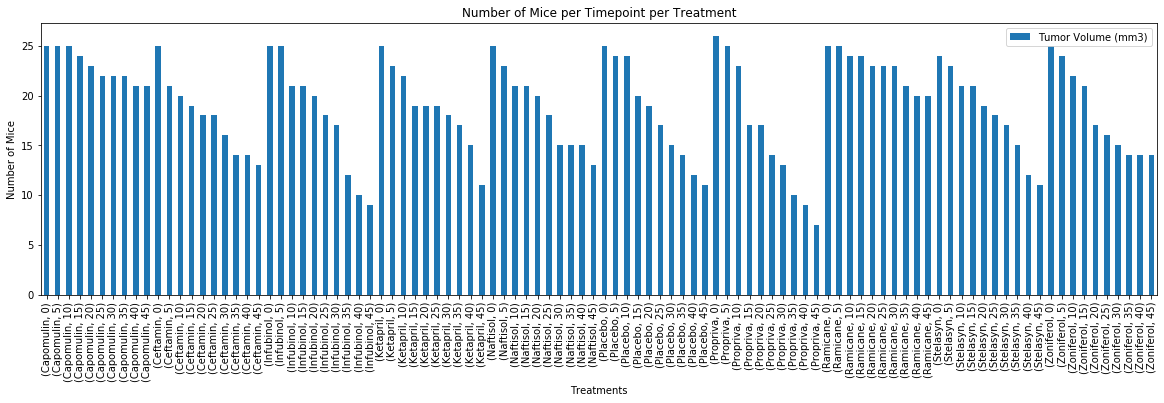

In [22]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]].copy()
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()
bar_df.plot(kind="bar", figsize=(20,5))
plt.title("Number of Mice per Timepoint per Treatment")
plt.xlabel("Treatments")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

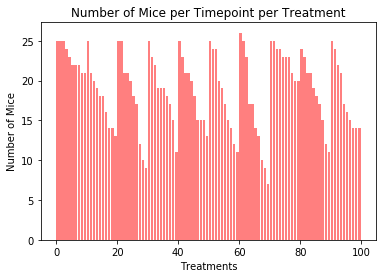

In [23]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
bar_df = merged_pd[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]].copy()
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()
x = np.arange(len(bar_df))
plt.bar(x, bar_df["Tumor Volume (mm3)"], color='r', alpha=0.5, align="edge")
plt.title("Number of Mice per Timepoint per Treatment")
plt.xlabel("Treatments")
plt.ylabel("Number of Mice")


## Pie Plots

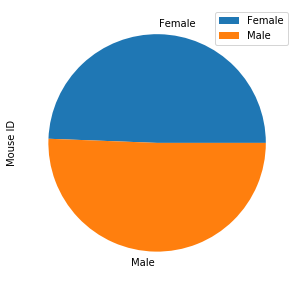

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_pd = merged_pd[["Sex", "Mouse ID"]].copy()
sex_pd= sex_pd.groupby(["Sex"]).count()
sex_pd.plot.pie(y='Mouse ID', figsize=(5, 5))



([<matplotlib.patches.Wedge at 0x1a1c262f50>,
 [Text(0.020992503472585564, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')])

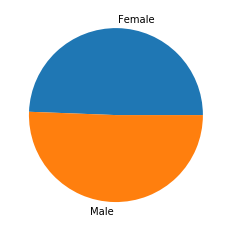

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pd = merged_pd[["Sex", "Mouse ID"]].copy()
sex_pd= sex_pd.groupby(["Sex"]).count()
labels = ["Female", "Male"]
plt.pie(sex_pd["Mouse ID"], labels = labels)



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr_pd = merged_pd[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Timepoint"]].copy
iqr_pd = pd.DataFrame(merged_pd)
iqr_pd = iqr_pd.set_index('Timepoint')
iqr_pd = iqr_pd.filter(like = '45', axis = 0)
iqr_pd = iqr_pd.set_index('Drug Regimen')

capomulin_pd = iqr_pd.filter(like = 'Capomulin', axis = 0)
ceftamin_pd = iqr_pd.filter(like = 'Ceftamin', axis = 0)
ramicane_pd = iqr_pd.filter(like = 'Ramicane', axis = 0)
zoniferol_pd = iqr_pd.filter(like = 'Zoniferol', axis = 0)

quartiles_capomulin = capomulin_pd["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_ceftamin = ceftamin_pd["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_ramicane = ramicane_pd["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_zoniferol = zoniferol_pd["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

lowerq_zoniferol = quartiles_zoniferol[0.25]
upperq_zoniferol = quartiles_zoniferol[0.75]
iqr_zoniferol = upperq_zoniferol - lowerq_zoniferol

lower_bound_zoniferol = lowerq_zoniferol - (1.5*iqr_zoniferol)
upper_bound_zoniferol = upperq_zoniferol + (1.5*iqr_zoniferol)

print("Any value below " + str(lower_bound_capomulin) + " or above " + str(upper_bound_capomulin) + " could be an outlier for Capomulin")
print("Any value below " + str(lower_bound_ceftamin) + " or above " + str(upper_bound_ceftamin) + " could be an outlier for Ceftamin")
print("Any value below " + str(lower_bound_ramicane) + " or above " + str(upper_bound_ramicane) + " could be an outlier for Ramicane")
print("Any value below " + str(lower_bound_zoniferol) + " or above " + str(upper_bound_zoniferol) + " could be an outlier for Zoniferol")


Any value below 20.70456164999999 or above 51.83201549 could be an outlier for Capomulin
Any value below 52.29350701999999 or above 76.66786758 could be an outlier for Ceftamin
Any value below 19.690480101250003 or above 49.79900043124999 could be an outlier for Ramicane
Any value below 54.03272699 or above 76.92718499000001 could be an outlier for Zoniferol


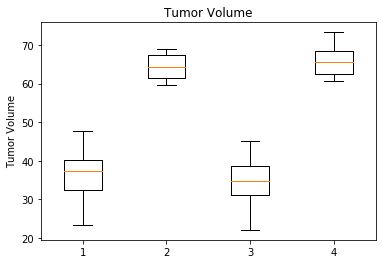

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot([capomulin_pd["Tumor Volume (mm3)"], ceftamin_pd["Tumor Volume (mm3)"], \
             ramicane_pd["Tumor Volume (mm3)"], zoniferol_pd["Tumor Volume (mm3)"]])
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

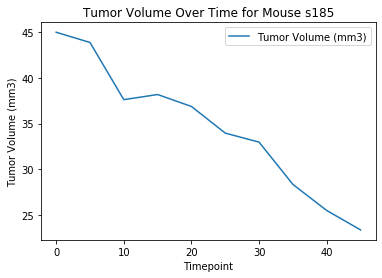

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Line_pd = merged_pd[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]].copy
Line_pd = pd.DataFrame(merged_pd)
Line_pd = Line_pd.set_index('Drug Regimen')
Line_pd = Line_pd.filter(like = 'Capomulin', axis = 0)
Line_pd = Line_pd.set_index('Mouse ID')
Line_pd = Line_pd.loc['s185']
Line_pd = Line_pd.filter(items = ['Timepoint', 'Tumor Volume (mm3)'])
Line_pd = Line_pd.set_index('Timepoint')
Line_pd.plot.line()
plt.title("Tumor Volume Over Time for Mouse s185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

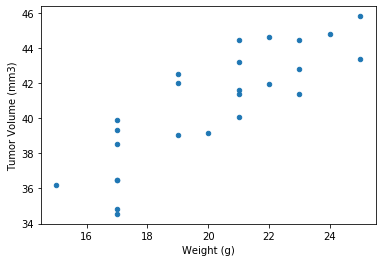

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_pd = merged_pd[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].copy
scatter_pd = pd.DataFrame(merged_pd)
scatter_pd = scatter_pd.set_index('Drug Regimen')
scatter_pd = scatter_pd.filter(like = 'Capomulin', axis = 0)
scatter_pd = scatter_pd.groupby("Mouse ID").mean()
scatter_pd = scatter_pd.sort_values(by = "Tumor Volume (mm3)", ascending = False)
scatter_pd.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')



## Correlation and Regression

The correlation between both factors is 0.84


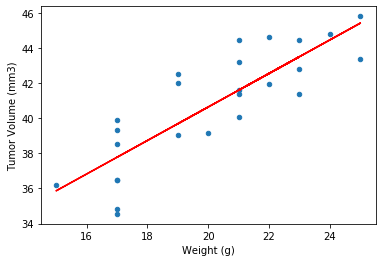

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_pd = merged_pd[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].copy
scatter_pd = pd.DataFrame(merged_pd)
scatter_pd = scatter_pd.set_index('Drug Regimen')
scatter_pd = scatter_pd.filter(like = 'Capomulin', axis = 0)
scatter_pd = scatter_pd.groupby("Mouse ID").mean()
scatter_pd = scatter_pd.sort_values(by = "Tumor Volume (mm3)", ascending = False)
scatter_pd.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')

scatter_pd
weight = scatter_pd.iloc[:,1]
volume = scatter_pd.iloc[:,3]
correlation = st.pearsonr(weight, volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = scatter_pd["Weight (g)"]
y_values = scatter_pd['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

